# Descripción del Dataset

GTZAN es un dataset comunmente utilizado para el problema de Clasificación de Genero de Musica, el cual contiene 10 diferentes géneros y cada uno de ellos contiene 100 audios diferentes del género que les corresponda.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import csv
import pandas as pd

#Cargar el dataset ya convertido en caracteristicas extraidas desde los espectrogramas de cada canción.
        
datos = pd.read_csv('dataset.csv')
datos.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
Blues,blues.00049.wav,0.277484,0.088607,1318.656822,1904.761177,3046.681577,0.039973,-255.965774,110.823046,21.505215,...,-2.442929,-7.130865,-11.163917,-12.609408,2.742009,-8.948849,-7.940728,-2.344157,-0.705606,Blues
Blues,blues.00045.wav,0.429511,0.148366,1739.019621,2290.401739,4551.155813,0.048052,-163.211141,89.791041,12.979256,...,6.008639,-2.910059,-0.434613,-17.545474,4.154533,-5.990226,-7.860423,-8.565096,1.857711,Blues
Blues,blues.00040.wav,0.397725,0.134892,2272.495079,2356.855937,5108.319111,0.097657,-110.260079,90.701812,-2.527487,...,5.952405,-8.033586,4.239868,-16.485552,6.542503,-5.695943,-3.640864,-4.856884,1.854516,Blues
Blues,blues.00010.wav,0.303954,0.142939,1410.469096,1512.620983,2767.274933,0.062981,-173.707514,137.156400,-23.766517,...,1.800535,-2.988374,-1.869389,-0.800155,-3.023782,-0.445196,-1.998228,-0.743599,-4.986112,Blues
Blues,blues.00097.wav,0.375158,0.198282,1236.574280,1602.309124,2604.150920,0.044626,-148.639173,145.746311,-9.363639,...,3.230693,-0.667060,-0.727791,-6.821160,-3.942547,-15.739370,-5.604688,-5.802770,-0.048729,Blues


In [2]:
#Borrar los nombres de los archivos
datos = datos.drop(['filename'],axis=1)

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Etiquetar
lista = datos.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(lista)

# Extraer los datos y escalar las caracteristicas

In [4]:
scaler = StandardScaler()
x = scaler.fit_transform(np.array(datos.iloc[:, :-1], dtype = float))

In [5]:
x.shape

(1000, 26)

In [6]:
y.shape

(1000,)

# Principal Component Analysis

In [7]:
# Matriz de covarianza

from numpy.core.numeric import dot,newaxis
def covarianza(matriz):
        matriz = np.array(matriz, dtype=float)
        tup = (slice(None),newaxis)
        matriz -= matriz.mean(axis=1)[tup]
        return (dot(matriz, matriz.T) /float((matriz.shape[1])-1))

In [8]:
c = covarianza(x.T)

In [9]:
# Eigenvalores y Eigenvectores
eigen_vals, eigen_vecs = np.linalg.eig(c)

In [10]:
print('\nEigenvalues {}'.format(eigen_vals))


Eigenvalues [8.39402206e+00 6.65038439e+00 2.70556857e+00 1.55716043e+00
 9.44893754e-01 8.95647175e-01 7.36347893e-01 5.41865773e-01
 4.57619380e-01 3.91700724e-01 2.90470291e-03 1.00438870e-02
 3.61821162e-02 7.67154961e-02 3.43939837e-01 3.23178683e-01
 1.10046746e-01 2.78625923e-01 1.35083154e-01 1.57169701e-01
 1.72213670e-01 1.87024278e-01 2.44251177e-01 2.40681068e-01
 2.10801151e-01 2.21954289e-01]


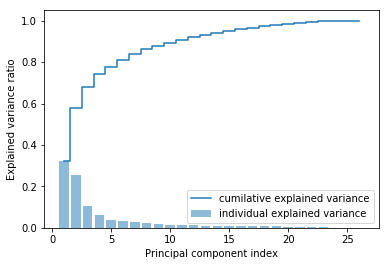

In [11]:
# Visualizar cuantas caracteristicas si son importantes
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 27), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 27), cum_var_exp, where='mid', label='cumilative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [12]:
# Ordenar los eigenvalores

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(8.394022064175704,
  array([ 0.15750582,  0.05561711,  0.0574533 , -0.0150956 ,  0.04592882,
          0.11974928,  0.13925357, -0.0502278 , -0.18185693,  0.23881511,
         -0.24722585,  0.27593969, -0.24765181,  0.29397243, -0.2242241 ,
          0.28413817, -0.22236792,  0.28003053, -0.24631895,  0.22855912,
         -0.22708602,  0.20040562, -0.1890193 ,  0.15377912, -0.15246124,
          0.09459368])),
 (6.650384387542687,
  array([-0.25704173, -0.24291229, -0.35592343, -0.35623335, -0.36023094,
         -0.27204858, -0.27349239,  0.35069671, -0.13047871,  0.07739774,
         -0.1182116 ,  0.00944076, -0.17618804, -0.03518951, -0.20296479,
         -0.06347919, -0.15938378, -0.06115316, -0.11547657, -0.07825034,
         -0.09739517, -0.0707386 , -0.08848425, -0.09888595, -0.0860358 ,
         -0.13073916])),
 (2.7055685664273446,
  array([-0.00397679,  0.10445276,  0.1480352 ,  0.14928239,  0.14742989,
          0.12951866,  0.18198664, -0.10893381,  0.05311177, -0.07850576

In [13]:
#Matriz de 26 x 6 de los primeros 6 eigenvectores
matriz_w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

for i in range(2,6):
    matriz_w = np.hstack((matriz_w, eigen_pairs[i][1][:, np.newaxis]))

In [14]:
matriz_w

array([[ 1.57505822e-01, -2.57041725e-01, -3.97679240e-03,
         2.13924590e-01,  1.59668222e-01, -1.29741689e-02],
       [ 5.56171110e-02, -2.42912292e-01,  1.04452757e-01,
         1.69251396e-01,  3.63316398e-01, -4.81251494e-01],
       [ 5.74533014e-02, -3.55923430e-01,  1.48035198e-01,
        -1.57543183e-01, -5.48300712e-02,  1.38331082e-01],
       [-1.50955966e-02, -3.56233346e-01,  1.49282388e-01,
        -3.93956816e-03, -2.37964813e-01,  2.26902453e-02],
       [ 4.59288151e-02, -3.60230943e-01,  1.47429892e-01,
        -9.39075395e-02, -1.39005841e-01,  7.60146700e-02],
       [ 1.19749283e-01, -2.72048578e-01,  1.29518657e-01,
        -3.29788941e-01,  1.27770239e-01,  2.56223871e-01],
       [ 1.39253569e-01, -2.73492388e-01,  1.81986641e-01,
         1.77095169e-02,  3.59036686e-01, -2.45545455e-01],
       [-5.02278025e-02,  3.50696709e-01, -1.08933810e-01,
         3.04832751e-02,  1.46174355e-01, -1.74130940e-01],
       [-1.81856932e-01, -1.30478707e-01,  5.311

In [15]:
matriz_w.shape

(26, 6)

In [16]:
# Convertir de 1000 x 26 a 1000 * 6
x_transformado = x.dot(matriz_w)
x_transformado

array([[-0.07595433,  3.44713347,  1.78783014,  1.87526523, -2.15557597,
        -1.49797127],
       [ 2.50764073,  1.31811374,  1.60820652,  2.98919535, -1.6004027 ,
        -0.90720853],
       [ 4.04184795,  0.74656738,  1.02655678,  0.82345323, -1.31246192,
        -0.69504844],
       ...,
       [ 3.27952521,  0.26366683, -0.48103871,  0.6777984 ,  0.04750238,
         0.21477341],
       [ 5.46414852, -0.72642423, -0.07276976, -2.15634865, -1.03682028,
         0.73414369],
       [-2.78701796, -0.17699565,  0.13127891,  0.25785926,  0.40081355,
         0.35506819]])

In [17]:
x_transformado.shape

(1000, 6)

In [18]:
#Visualizamos los datos
'''
# les's visualize the transformed Wine training set.
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
markers = ['o', 'v', '8', 's', 'p', '*', 'h', 'd', '^', 'x']
for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(x_transformado[y==l, 0], x_transformado[y==l, 1], c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

'''

"\n# les's visualize the transformed Wine training set.\ncolors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']\nmarkers = ['o', 'v', '8', 's', 'p', '*', 'h', 'd', '^', 'x']\nfor l, c, m in zip(np.unique(y), colors, markers):\n    plt.scatter(x_transformado[y==l, 0], x_transformado[y==l, 1], c=c, label=l, marker=m)\n    \nplt.xlabel('PC 1')\nplt.ylabel('PC 2')\nplt.legend(loc='lower left')\nplt.show()\n\n"

In [19]:
from sklearn.model_selection import train_test_split

#Dividir training set y testing set
x_train, x_test, y_train, y_test = train_test_split(x_transformado, y , train_size = 0.8, random_state =  1997)

/home/alopolisia/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
x_train.shape

(800, 6)

# GridSearchCV

In [21]:
#Aplicamos gridshearch cv para encontrar los mejores parametros de KNN

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#Pipeline de KNeighbors
pipeline_kn = Pipeline([
    ('kn', KNeighborsClassifier())
])

#Parametros de KNeighbors
parametro_kn = {'kn__n_neighbors': [1,2,4,6,8,10], 'kn__weights':['uniform', 'distance']}


#Pipeline de KNeighbors
pipeline_r = Pipeline([
    ('r', RandomForestClassifier())
])

#Parametros de RandomForest
parametro_r = {
    'r__bootstrap': [True],
    'r__max_depth': [10, 50, 100],
    'r__max_features': [2, 3],
    'r__min_samples_leaf': [3, 5],
    'r__min_samples_split': [2, 7],
    'r__n_estimators': [100, 200, 300]
}


#Pipeline de Maquina de Soporte Vectorial
pipeline_svm = Pipeline([
    ('svm', SVC())
])

parametro_svm = [
        {'svm__kernel': ['linear'], 'svm__C': [10., 100., 1000.0, 10000.0]},
        {'svm__kernel': ['rbf'], 'svm__C': [1.0, 10., 100., 1000.0, 10000.0],
         'svm__gamma': [0.01, 0.1, 1.0]},
    ]

In [22]:
from sklearn.model_selection import GridSearchCV

gridCV_kn = GridSearchCV(pipeline_kn, param_grid = parametro_kn, cv=10, n_jobs = -1, verbose = 3, return_train_score=True)

gridCV_kn.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.1s finished
/home/alopolisia/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kn__n_neighbors': [1, 2, 4, 6, 8, 10], 'kn__weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [23]:
gridCV_kn.best_params_

{'kn__n_neighbors': 10, 'kn__weights': 'distance'}

In [24]:
#Score del vecino
gridCV_kn.best_score_

0.5275

In [25]:
gridCV_r = GridSearchCV(pipeline_r, param_grid = parametro_r, cv=5, n_jobs = -1, verbose = 3, return_train_score=True)

gridCV_r.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   28.4s finished
/home/alopolisia/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('r', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'r__bootstrap': [True], 'r__max_depth': [10, 50, 100], 'r__max_features': [2, 3], 'r__min_samples_leaf': [3, 5], 'r__min_samples_split': [2, 7], 'r__n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [26]:
gridCV_r.best_params_

{'r__bootstrap': True,
 'r__max_depth': 100,
 'r__max_features': 2,
 'r__min_samples_leaf': 3,
 'r__min_samples_split': 2,
 'r__n_estimators': 100}

In [27]:
#Score de random forest
gridCV_r.best_score_

0.52125

In [28]:
gridCV_svm = GridSearchCV(pipeline_svm, param_grid = parametro_svm, cv=5, n_jobs = -1, verbose = 3, return_train_score=True)

gridCV_svm.fit(x_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:  3.9min finished
/home/alopolisia/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'svm__kernel': ['linear'], 'svm__C': [10.0, 100.0, 1000.0, 10000.0]}, {'svm__kernel': ['rbf'], 'svm__C': [1.0, 10.0, 100.0, 1000.0, 10000.0], 'svm__gamma': [0.01, 0.1, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [29]:
gridCV_svm.best_params_

{'svm__C': 100.0, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

In [30]:
#Score de svm
gridCV_svm.best_score_

0.55

In [31]:
# Entrenar con los mejores parametros
elvecinochido = KNeighborsClassifier(10, 'distance')

In [32]:
elvecinochido.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

In [33]:
bosquechido = RandomForestClassifier(bootstrap = True, max_depth = 100, max_features = 2, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 100)

In [34]:
bosquechido.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
svmchido = SVC(C=100.0, gamma=0.01, kernel='rbf')

In [36]:
svmchido.fit(x_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Precision, Recall y F1 de K - Neighbors

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

elvecinochido_predict = elvecinochido.predict(x_test)
bosquechido_predict = bosquechido.predict(x_test)
svmchido_predict = svmchido.predict(x_test)

In [38]:
p_vecino = precision_score(y_test, elvecinochido_predict, average='micro')
r_vecino = recall_score(y_test, elvecinochido_predict, average='micro')
f_vecino = f1_score(y_test, elvecinochido_predict, average='micro')

p_bosque = precision_score(y_test, bosquechido_predict, average='micro')
r_bosque = recall_score(y_test, bosquechido_predict, average='micro')
f_bosque = f1_score(y_test, bosquechido_predict, average='micro')

p_svm = precision_score(y_test, svmchido_predict, average='micro')
r_svm = recall_score(y_test, svmchido_predict, average='micro')
f_svm = f1_score(y_test, svmchido_predict, average='micro')

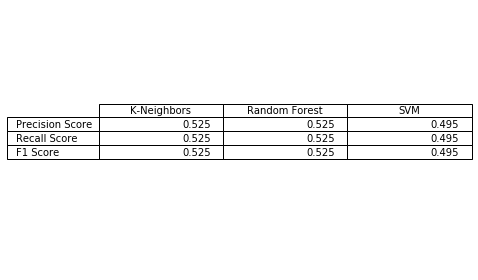

In [39]:
#La tabla de comparacion :v
import pandas as pd
fig, ax = plt.subplots()

ax.axis('off')
ax.axis('tight')

columnas = ('K-Neighbors', 'Random Forest', 'SVM')
filas = ('Precision Score', 'Recall Score', 'F1 Score')
valores=[[p_vecino,p_bosque,p_svm],[r_vecino, r_bosque, r_svm],[f_vecino, f_bosque, f_svm]]
#valores=[[prom_pv,prom_pb],[prom_rv, prom_rb],[prom_fv, prom_fb]]

df = pd.DataFrame(valores, columns=columnas, index= filas)

ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center')

fig.tight_layout()

plt.show()

# Conclusión

En conclusión el problema de la clasificación de género de musica es un problema un poco más complejo, ya que las características que se extrayeron a través de los espectrogramas llegaron a ser 26 caracteristicas, aunque pudieron ser reducidas a 6 caracteristicas mediante el uso de la técnica Principal Component Analysis. Sin embargo, no existe una diferencia significante en los resultados que se obtuvieron aplicando PCA o con todas las 26 caracteristicas originales.